[The challenges of modeling churn](https://neilpatel.com/blog/modeling-churn/)

[Why churn analysis is valuable for companies](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[Git social](https://github.com/VinaySagar92/Git-Social)

[Azure revenue](https://www.forbes.com/sites/bobevans1/2018/10/29/1-microsoft-beats-amazon-in-12-month-cloud-revenue-26-7-billion-to-23-4-billion-ibm-third/#2c9e12912bf1)

[Why did Microsoft pay so much for GitHub](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import helper as h

[Group each in BigQuery](https://stackoverflow.com/questions/22600299/understanding-resources-exceeded-during-query-execution-with-group-each-by-in)

In [21]:
user_data = h.get_merged_data(appName='data-exploration', year='2018').toPandas()
user_data.head()

% of users dropped 56.11664591116646


,login,followers_count,following_count,blog,company,created_at,public_repos_count,public_gists_count,hireable,updated_at,...,GollumEvent_count,IssueCommentEvent_count,IssuesEvent_count,MemberEvent_count,PublicEvent_count,PullRequestEvent_count,PullRequestReviewCommentEvent_count,PushEvent_count,ReleaseEvent_count,WatchEvent_count
0,0loky0,0,1,0,0,2011-05-24 20:15:25+00:00,7.0,0.0,1,2019-01-09 15:03:59+00:00,...,0,0,0,0,0,0,0,32,0,0
1,1xPdd,0,0,0,0,2014-07-11 03:45:56+00:00,0.0,0.0,0,2018-12-16 00:55:16+00:00,...,0,5,2,0,0,0,0,0,0,1
2,2582056905xy,2,6,0,0,2014-04-24 14:51:26+00:00,35.0,0.0,0,2018-10-18 01:47:18+00:00,...,0,0,0,0,0,0,0,0,0,1
3,AJ340,3,6,1,0,2016-04-15 18:12:45+00:00,17.0,0.0,0,2019-01-07 16:25:43+00:00,...,0,0,0,0,0,0,0,4,0,0
4,AaronWB,3,0,1,0,2014-02-11 15:03:04+00:00,25.0,1.0,0,2019-01-20 11:57:00+00:00,...,0,1,3,0,0,0,0,9,1,2


In [22]:
user_data = h.add_time_columns(user_data)
user_data.dtypes

login                                          object
followers_count                                 int32
following_count                                 int32
blog                                            int32
company                                         int32
created_at                             datetime64[ns]
public_repos_count                            float64
public_gists_count                            float64
hireable                                        int32
updated_at                                     object
time_between_first_last_event                 float64
last_event                             datetime64[ns]
first_event                            datetime64[ns]
frequency                                       int32
second_period_event_count                       int32
CommitCommentEvent_count                        int32
CreateEvent_count                               int32
DeleteEvent_count                               int32
ForkEvent_count             

In [23]:
user_data = user_data.dropna()
user_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers_count,84482.0,11.598707,104.662198,0.000000,0.000000,2.000000,7.000000,20127.000000
following_count,84482.0,9.149985,77.163988,0.000000,0.000000,1.000000,7.000000,18344.000000
blog,84482.0,0.296430,0.456686,0.000000,0.000000,0.000000,1.000000,1.000000
company,84482.0,0.263926,0.440762,0.000000,0.000000,0.000000,1.000000,1.000000
public_repos_count,84482.0,22.282167,85.286348,0.000000,5.000000,11.000000,24.000000,18856.000000
public_gists_count,84482.0,3.196432,14.995114,0.000000,0.000000,0.000000,1.000000,1291.000000
hireable,84482.0,0.168438,0.374257,0.000000,0.000000,0.000000,0.000000,1.000000
time_between_first_last_event,84482.0,75.498052,55.794139,0.000000,11.828452,84.132894,129.974679,151.993773
frequency,84482.0,40.434388,75.700009,1.000000,4.000000,12.000000,40.000000,599.000000
second_period_event_count,84482.0,35.775301,102.859951,0.000000,1.000000,7.000000,30.000000,12887.000000


/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


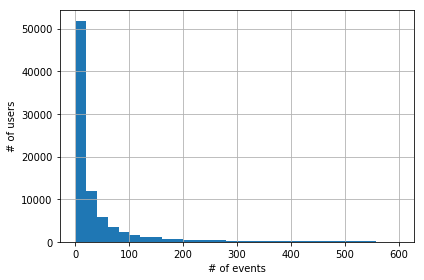

In [24]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.frequency.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_firstHalf2016.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfbd679198>,
      dtype=object)

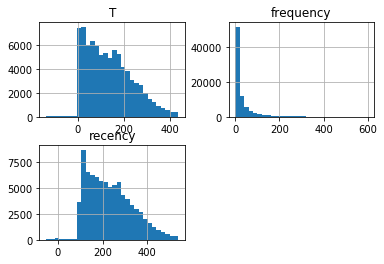

In [25]:
user_data[['frequency', 'T', 'recency']].hist(bins=30)

In [26]:
print('{0}% of users churned in second period'.format(
    np.round(np.sum(user_data.second_period_event_count < 1) / len(user_data) * 100, 2)))

22.73% of users churned in second period


Text(0, 0.5, '# of users')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


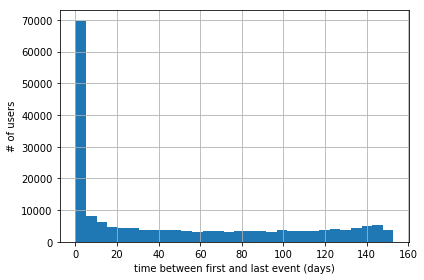

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
user_data.time_between_first_last_event.hist(ax=ax, bins=30)
ax.set_xlabel('time between first and last event (days)')
ax.set_ylabel('# of users')


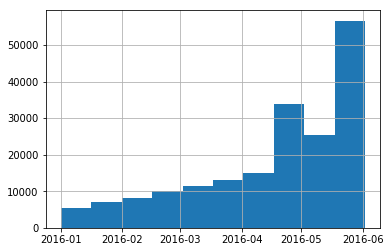

In [9]:
user_data.last_event.hist()

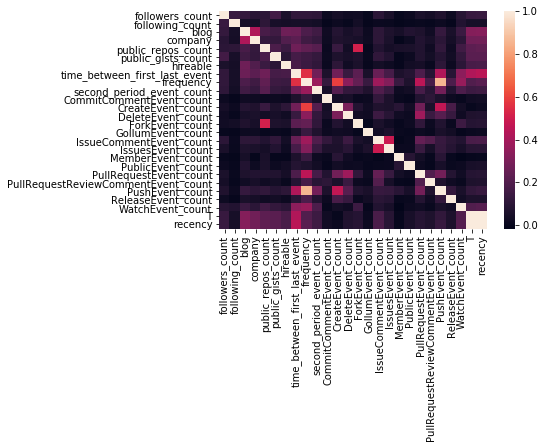

In [10]:
corr = user_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

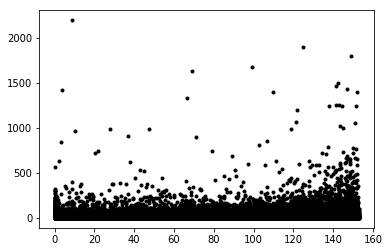

In [11]:
fig, ax = plt.subplots(1,1)

ax.plot(user_data.time_between_first_last_event, user_data.public_repos_count, 'k.')

In [12]:
churned = user_data[user_data.second_period_event_count == 0]
active = user_data[user_data.second_period_event_count > 0]

In [13]:
print('N churned {0}, N active {1}'.format(len(churned), len(active)))

N churned 87387, N active 98726


In [14]:
def plot_active_VS_churned(predictor='frequency'):
    fig, ax = plt.subplots(1,1)
    fig.set_tight_layout(True)

    ax.bar([1, 2], [churned[predictor].mean(), active[predictor].mean()], 
           yerr=[churned[predictor].std() / np.sqrt(len(churned)), 
                 churned[predictor].std() / np.sqrt(len(churned))])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['churned', 'active'])
    ax.set_ylabel(predictor + ' (Jan-May 2016)')

    fig.savefig('figures/' + predictor + '_churnedVSactive.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


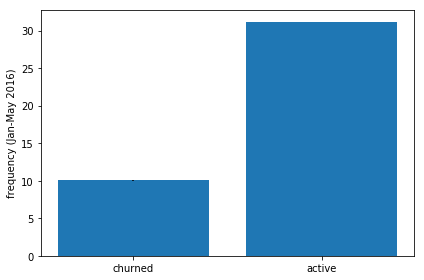

In [15]:
plot_active_VS_churned('frequency')

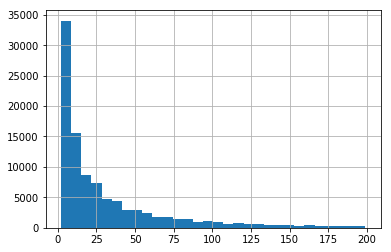

In [16]:
active.frequency.hist(bins=30)

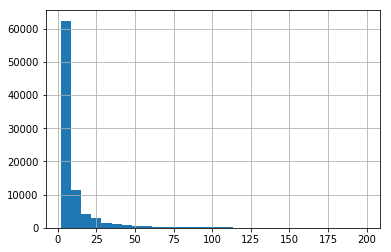

In [17]:
churned.frequency.hist(bins=30)

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


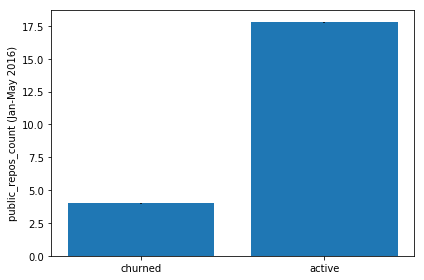

In [18]:
plot_active_VS_churned('public_repos_count')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


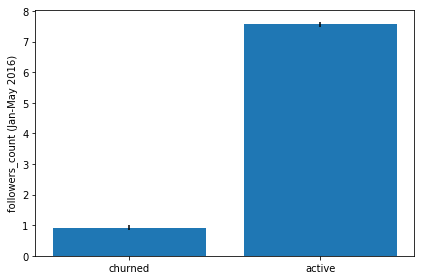

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


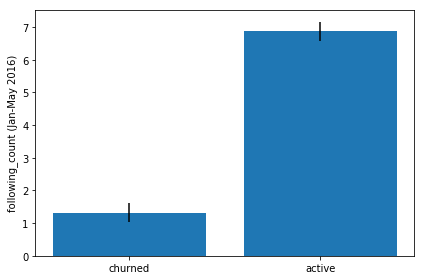

In [19]:
plot_active_VS_churned('followers_count')
plot_active_VS_churned('following_count')

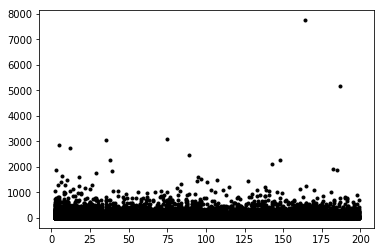

In [20]:
plt.plot(user_data.frequency, user_data.second_period_event_count, 'k.')